In [1]:
import numpy as np

In [2]:
import tensorflow as tf
import tensorflow_hub as tfhub
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [3]:
import tensorflow as tf

img_path = 'https://www.hotelscombined.co.kr/rimg/himg/38/19/92/revato-1853338-12340940-235256.jpg?width=720&height=576&crop=true'
img = tf.keras.utils.get_file(fname='gangnam', origin=img_path)
img = tf.io.read_file(img) #파일객체를 stringd로 변환
img = tf.image.decode_jpeg(img, channels=3) #문자=>숫자타입 변환
img = tf.image.convert_image_dtype(img, tf.float32)#0~1로 정규화

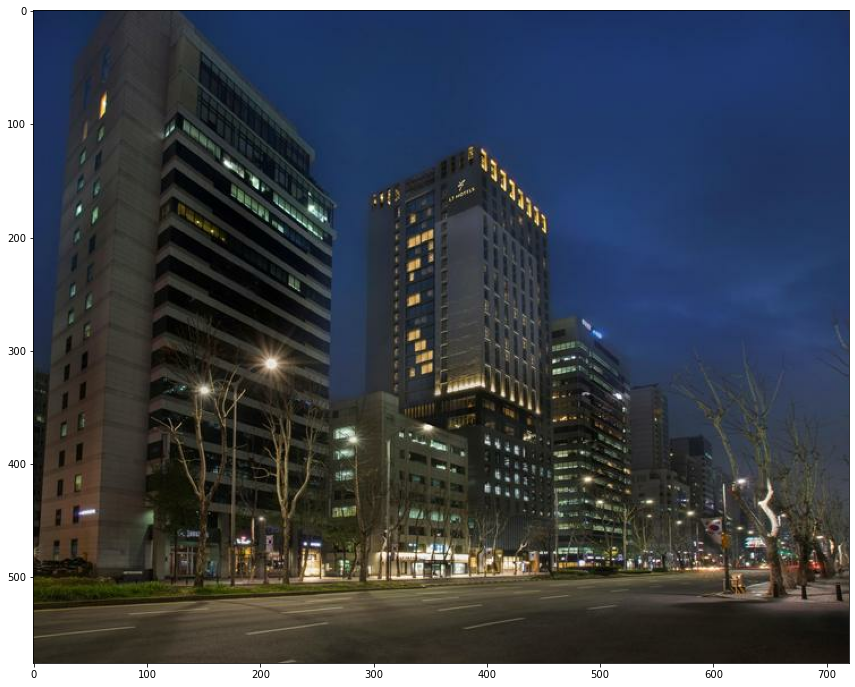

In [4]:
plt.figure(figsize=(15,12))
plt.imshow(img)

In [5]:
print(f'img shape : {img.shape}')
img_input = tf.expand_dims(img, 0)
print(f'img shape : {img_input.shape}')

img shape : (576, 720, 3)
img shape : (1, 576, 720, 3)


### 사전 학습 모델 Faster R-CNN 알고리즘

In [6]:
model = tfhub.load('https://tfhub.dev/google/faster_rcnn/openimages_v4/inception_resnet_v2/1')#모델로드

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [7]:
model.signatures.keys()#모델 시그니쳐 확인

KeysView(_SignatureMap({'default': <tensorflow.python.eager.wrap_function.WrappedFunction object at 0x000001CE87A8E668>}))

In [8]:
object_Detector = model.signatures['default']#시그니쳐 default 지정 후 인스턴스 생성
object_Detector

In [9]:
result = object_Detector(img_input)
result.keys()#result가 가진 키값 확인


dict_keys(['detection_class_labels', 'detection_scores', 'detection_boxes', 'detection_class_entities', 'detection_class_names'])

In [13]:
len(result['detection_scores'])#탐지한 객체 개수

100

In [15]:
boxes = result['detection_boxes'] #bounding 좌표에측 값
labels = result['detection_class_entities']#분류 예측 값
scores = result['detection_scores']#신뢰도
img_height, img_width = img.shape[0], img.shape[1]
obj_to_dect = 10 #탐지 객체 개수
#시각화


In [26]:
infer_score = int(scores[3].numpy()*100)
infer_score

59

In [31]:
class_name = labels[1].numpy().decode('utf-8')
class_name


'Skyscraper'

In [32]:
annotation = "{}:{}%".format(class_name, infer_score)

In [36]:
obj_to_dect

10

In [35]:
boxes.shape[0]

100

In [19]:
labels[0]

<tf.Tensor: shape=(), dtype=string, numpy=b'Skyscraper'>

### 아무래도 버전 문제인지 작동을 안함

In [ ]:
import numpy as np
plt.figure(figsize=(15,10))
for i in range(min(obj_to_dect,boxes.shape[0])):
    if scores[i]>=0.3:#0.2이상의 객체신뢰도
        (ymax, xmin, ymin, xmax) = (boxes[i][0]*img_height, boxes[i][1]*img_width, boxes[i][2]*img_height, boxes[i][3]*img_width)
        plt.imshow(img)
        plt.plot([xmin,xmax,xmax,xmin,xmin],[ymin,ymin,ymax,ymax,ymin],color = 'yellow', linewidth = 2)
        class_name = (labels[i]).numpy().decode('utf-8')
        infer_score = int(scores[i].numpy()*100)
        annotation = "{}:{}".format(class_name, infer_score)
        plt.text(xmin+10, ymax+10, annotation, fontsize= 10, color = 'white', backgroundcolor = 'blue')